# 1. BTC/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 48ms/step - loss: 0.0354 - val_loss: 0.0038
Epoch 2/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0049 - val_loss: 7.9548e-04
Epoch 3/100
20/20 [==============================] - 1s 34ms/step - loss: 9.5493e-04 - val_loss: 8.2772e-04
Epoch 4/100
20/20 [==============================] - 1s 33ms/step - loss: 6.6387e-04 - val_loss: 5.8563e-04
Epoch 5/100
20/20 [==============================] - 1s 32ms/step - loss: 5.8250e-04 - val_loss: 5.0463e-04
Epoch 6/100
20/20 [==============================] - 1s 33ms/step - loss: 5.6021e-04 - val_loss: 4.4859e-04
Epoch 7/100
20/20 [==============================] - 1s 33ms/step - loss: 5.4610e-04 - val_loss: 4.5178e-04
Epoch 8/100
20/20 [==============================] - 1s 32ms/step - loss: 5.3156e-04 - val_loss: 5.2581e-04
Epoch 9/100
20/20 [==============================] - 1s 32ms/step - loss: 5.1987e-04 - val_loss: 4.4627e-04
Epoch 10/100
20/20 [====================

In [14]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 6ms/step


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 48.06692982241042
RMSE: 0.01705728108045463
MAE: 0.010716332125438752


In [16]:
y_pred=scaler.inverse_transform(y_pred)

In [17]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

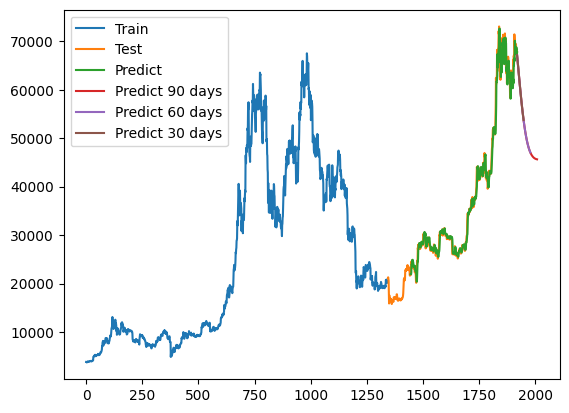

In [18]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 50ms/step - loss: 0.0441 - val_loss: 0.0051
Epoch 2/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 1s 34ms/step - loss: 8.4403e-04 - val_loss: 4.5606e-04
Epoch 4/100
20/20 [==============================] - 1s 32ms/step - loss: 7.3551e-04 - val_loss: 4.0517e-04
Epoch 5/100
20/20 [==============================] - 1s 34ms/step - loss: 6.8801e-04 - val_loss: 4.2191e-04
Epoch 6/100
20/20 [==============================] - 1s 33ms/step - loss: 6.7587e-04 - val_loss: 3.7203e-04
Epoch 7/100
20/20 [==============================] - 1s 32ms/step - loss: 6.3843e-04 - val_loss: 4.1985e-04
Epoch 8/100
20/20 [==============================] - 1s 33ms/step - loss: 6.1852e-04 - val_loss: 3.5547e-04
Epoch 9/100
20/20 [==============================] - 1s 34ms/step - loss: 6.0373e-04 - val_loss: 3.6690e-04
Epoch 10/100
20/20 [========================

In [10]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 6ms/step


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 32.37387644538814
RMSE: 0.015378705974694502
MAE: 0.009591538300767727


In [12]:
y_pred=scaler.inverse_transform(y_pred)

In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

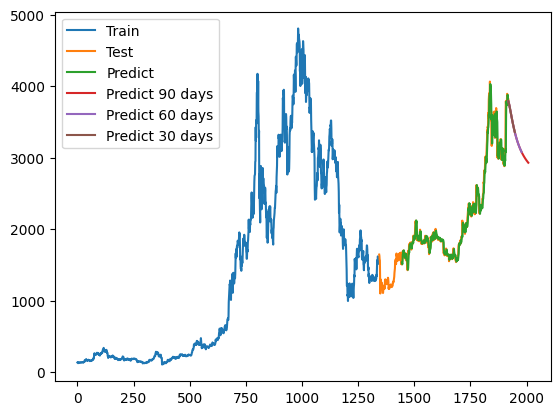

In [14]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 52ms/step - loss: 0.0526 - val_loss: 0.0067
Epoch 2/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0066 - val_loss: 0.0015
Epoch 3/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0013 - val_loss: 7.0093e-04
Epoch 4/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0010 - val_loss: 5.2838e-04
Epoch 5/100
20/20 [==============================] - 1s 33ms/step - loss: 9.3709e-04 - val_loss: 4.6907e-04
Epoch 6/100
20/20 [==============================] - 1s 34ms/step - loss: 8.9962e-04 - val_loss: 4.7886e-04
Epoch 7/100
20/20 [==============================] - 1s 34ms/step - loss: 9.1485e-04 - val_loss: 4.4458e-04
Epoch 8/100
20/20 [==============================] - 1s 34ms/step - loss: 8.4261e-04 - val_loss: 4.2268e-04
Epoch 9/100
20/20 [==============================] - 1s 34ms/step - loss: 8.1508e-04 - val_loss: 4.0686e-04
Epoch 10/100
20/20 [==============================] 

In [10]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 6ms/step


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 39.73809677343224
RMSE: 0.017016056807877846
MAE: 0.01093134904755397


In [12]:
y_pred=scaler.inverse_transform(y_pred)

In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

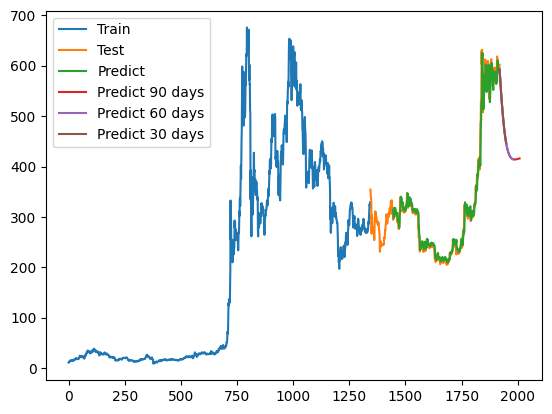

In [14]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 3s 48ms/step - loss: 0.0812 - val_loss: 0.0080
Epoch 2/100
23/23 [==============================] - 1s 30ms/step - loss: 0.0115 - val_loss: 0.0090
Epoch 3/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 1s 32ms/step - loss: 8.4539e-04 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 1s 32ms/step - loss: 7.3078e-04 - val_loss: 9.1978e-04
Epoch 6/100
23/23 [==============================] - 1s 32ms/step - loss: 6.8797e-04 - val_loss: 8.8725e-04
Epoch 7/100
23/23 [==============================] - 1s 31ms/step - loss: 6.5384e-04 - val_loss: 8.2844e-04
Epoch 8/100
23/23 [==============================] - 1s 32ms/step - loss: 6.3827e-04 - val_loss: 7.8827e-04
Epoch 9/100
23/23 [==============================] - 1s 31ms/step - loss: 5.9955e-04 - val_loss: 7.8771e-04
Epoch 10/100
23/23 [==============================] - 1s

In [11]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 46.46631625639844
RMSE: 0.02070251403504775
MAE: 0.014330925143574718


In [13]:
y_pred=scaler.inverse_transform(y_pred)

In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

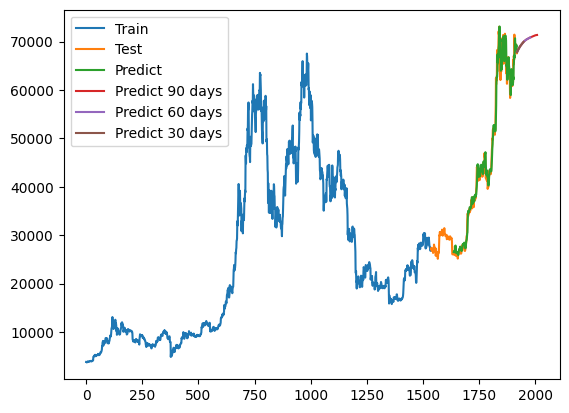

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 3s 47ms/step - loss: 0.0439 - val_loss: 0.0024
Epoch 2/100
23/23 [==============================] - 1s 33ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 3/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0012 - val_loss: 8.3559e-04
Epoch 4/100
23/23 [==============================] - 1s 32ms/step - loss: 8.3676e-04 - val_loss: 6.8557e-04
Epoch 5/100
23/23 [==============================] - 1s 34ms/step - loss: 7.5422e-04 - val_loss: 6.5521e-04
Epoch 6/100
23/23 [==============================] - 1s 32ms/step - loss: 7.1306e-04 - val_loss: 6.3359e-04
Epoch 7/100
23/23 [==============================] - 1s 33ms/step - loss: 6.7667e-04 - val_loss: 6.0533e-04
Epoch 8/100
23/23 [==============================] - 1s 32ms/step - loss: 6.5611e-04 - val_loss: 5.8407e-04
Epoch 9/100
23/23 [==============================] - 1s 33ms/step - loss: 6.4398e-04 - val_loss: 5.6341e-04
Epoch 10/100
23/23 [============================

In [11]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 37.035530934732826
RMSE: 0.018637560043810467
MAE: 0.01258221211016996


In [13]:
y_pred=scaler.inverse_transform(y_pred)

In [17]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

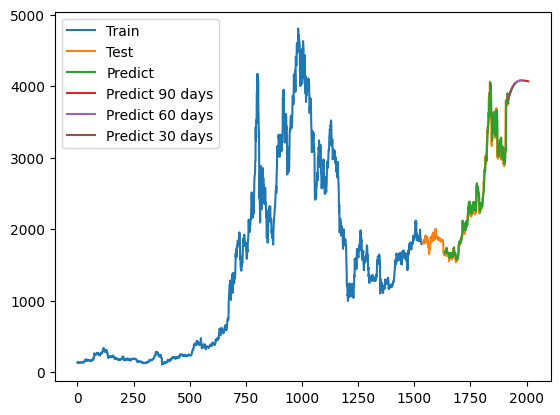

In [18]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 6. BNB/USD Dataset (Data split 8:2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 3s 47ms/step - loss: 0.0452 - val_loss: 0.0041
Epoch 2/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0042 - val_loss: 9.5250e-04
Epoch 3/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0011 - val_loss: 7.9625e-04
Epoch 4/100
23/23 [==============================] - 1s 32ms/step - loss: 9.6604e-04 - val_loss: 7.0437e-04
Epoch 5/100
23/23 [==============================] - 1s 32ms/step - loss: 9.1995e-04 - val_loss: 6.7591e-04
Epoch 6/100
23/23 [==============================] - 1s 32ms/step - loss: 8.6626e-04 - val_loss: 6.7213e-04
Epoch 7/100
23/23 [==============================] - 1s 33ms/step - loss: 8.3692e-04 - val_loss: 6.2714e-04
Epoch 8/100
23/23 [==============================] - 1s 33ms/step - loss: 8.0268e-04 - val_loss: 6.1806e-04
Epoch 9/100
23/23 [==============================] - 1s 32ms/step - loss: 7.8036e-04 - val_loss: 6.2394e-04
Epoch 10/100
23/23 [========================

In [10]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 51.017090817847624
RMSE: 0.0196557322829109
MAE: 0.012882551573813732


In [12]:
y_pred=scaler.inverse_transform(y_pred)

In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

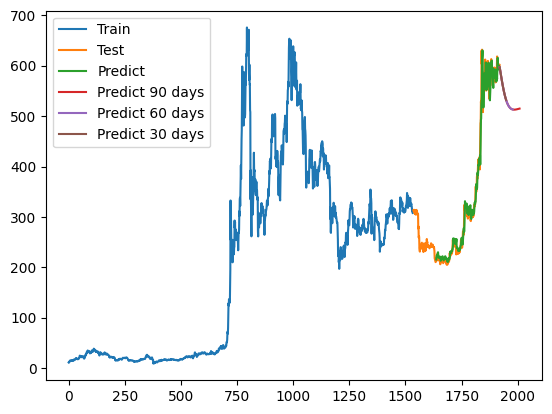

In [14]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 7. BTC/USD Dataset (Data split 9:1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 3s 43ms/step - loss: 0.0352 - val_loss: 0.0322
Epoch 2/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 3/100
26/26 [==============================] - 1s 31ms/step - loss: 7.1941e-04 - val_loss: 0.0016
Epoch 4/100
26/26 [==============================] - 1s 30ms/step - loss: 6.2429e-04 - val_loss: 0.0016
Epoch 5/100
26/26 [==============================] - 1s 31ms/step - loss: 5.7513e-04 - val_loss: 0.0013
Epoch 6/100
26/26 [==============================] - 1s 31ms/step - loss: 5.3699e-04 - val_loss: 0.0013
Epoch 7/100
26/26 [==============================] - 1s 31ms/step - loss: 5.0292e-04 - val_loss: 0.0012
Epoch 8/100
26/26 [==============================] - 1s 31ms/step - loss: 4.7896e-04 - val_loss: 0.0011
Epoch 9/100
26/26 [==============================] - 1s 30ms/step - loss: 4.6672e-04 - val_loss: 0.0011
Epoch 10/100
26/26 [==============================] - 1s 30ms/step - los

In [10]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 6.0900845763316145
RMSE: 0.029612573345686316
MAE: 0.022283068468501206


In [12]:
y_pred=scaler.inverse_transform(y_pred)

In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

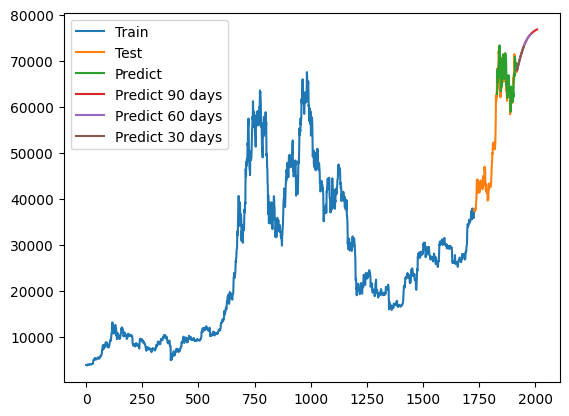

In [14]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 8. ETH/USD Dataset (Data split 9:1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 3s 45ms/step - loss: 0.0563 - val_loss: 0.0074
Epoch 2/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0063 - val_loss: 0.0015
Epoch 3/100
26/26 [==============================] - 1s 31ms/step - loss: 9.4730e-04 - val_loss: 0.0018
Epoch 4/100
26/26 [==============================] - 1s 32ms/step - loss: 6.7042e-04 - val_loss: 0.0015
Epoch 5/100
26/26 [==============================] - 1s 31ms/step - loss: 6.3229e-04 - val_loss: 0.0013
Epoch 6/100
26/26 [==============================] - 1s 31ms/step - loss: 6.0916e-04 - val_loss: 0.0013
Epoch 7/100
26/26 [==============================] - 1s 33ms/step - loss: 5.8462e-04 - val_loss: 0.0014
Epoch 8/100
26/26 [==============================] - 1s 33ms/step - loss: 5.6573e-04 - val_loss: 0.0012
Epoch 9/100
26/26 [==============================] - 1s 32ms/step - loss: 5.4084e-04 - val_loss: 0.0012
Epoch 10/100
26/26 [==============================] - 1s 32ms/step - los

In [11]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 11.142386575121742
RMSE: 0.0281615854624697
MAE: 0.01981906379186693


In [13]:
y_pred=scaler.inverse_transform(y_pred)

In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

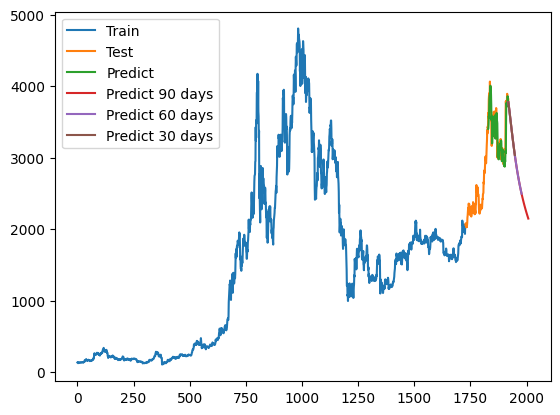

In [17]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 9. BNB/USD Dataset (Data split 9:1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 3s 43ms/step - loss: 0.0720 - val_loss: 0.0083
Epoch 2/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0071 - val_loss: 0.0022
Epoch 3/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 4/100
26/26 [==============================] - 1s 30ms/step - loss: 9.9602e-04 - val_loss: 0.0020
Epoch 5/100
26/26 [==============================] - 1s 30ms/step - loss: 8.8157e-04 - val_loss: 0.0018
Epoch 6/100
26/26 [==============================] - 1s 30ms/step - loss: 8.4106e-04 - val_loss: 0.0017
Epoch 7/100
26/26 [==============================] - 1s 30ms/step - loss: 8.0552e-04 - val_loss: 0.0016
Epoch 8/100
26/26 [==============================] - 1s 31ms/step - loss: 7.8997e-04 - val_loss: 0.0016
Epoch 9/100
26/26 [==============================] - 1s 30ms/step - loss: 7.4051e-04 - val_loss: 0.0016
Epoch 10/100
26/26 [==============================] - 1s 31ms/step - loss: 7

In [11]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 8.869144114328305
RMSE: 0.03306326663161516
MAE: 0.024053080139462717


In [13]:
y_pred=scaler.inverse_transform(y_pred)

In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

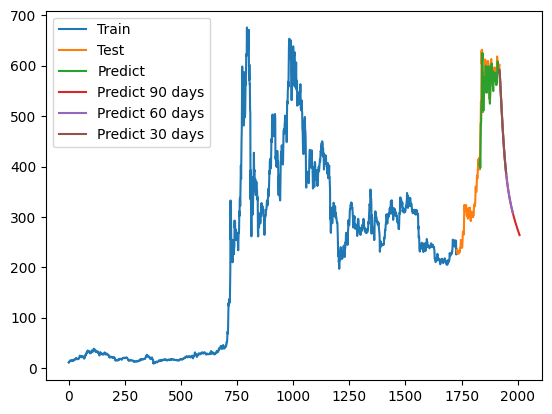

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()